# Identificar fronteras no lineales

In [1]:
from sklearn.datasets.samples_generator import make_circles, make_blobs

In [2]:
X, Y = make_circles(100, factor = .1, noise = .1) 

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

In [4]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Generamos la parrila de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    
    ##Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])
        
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], 
                   model.support_vectors_[:,1], 
                   s=300, linewidth=1, facecolors = "blue");
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    

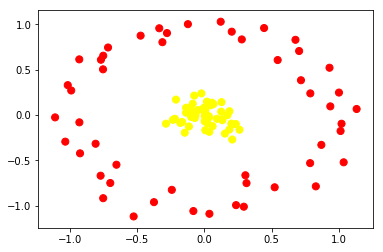

In [5]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

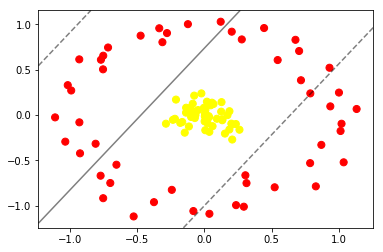

In [6]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(SVC(kernel="linear").fit(X,Y), plot_support=False)

In [7]:
r = np.exp(-(X**2).sum(1))

In [8]:
r

array([0.94239423, 0.35232337, 0.9100115 , 0.97219792, 0.94994111,
       0.34218596, 0.98983614, 0.92910159, 0.34920943, 0.28890626,
       0.58588122, 0.47011361, 0.41264059, 0.913027  , 0.35801663,
       0.98446918, 0.96476456, 0.41872051, 0.99978311, 0.9609417 ,
       0.98081387, 0.48269583, 0.94394707, 0.51500528, 0.33010284,
       0.40687966, 0.89046862, 0.35217042, 0.21696302, 0.97098164,
       0.97993725, 0.37045056, 0.95197504, 0.97928486, 0.99478836,
       0.35049235, 0.99462739, 0.36115426, 0.99882118, 0.29141789,
       0.27678975, 0.94800958, 0.3714876 , 0.34503708, 0.97538781,
       0.9711278 , 0.32758899, 0.9513744 , 0.98284164, 0.93684481,
       0.9773113 , 0.99513442, 0.30483081, 0.98980398, 0.99115731,
       0.34592796, 0.51577582, 0.94438995, 0.99693445, 0.38184987,
       0.37033279, 0.46231035, 0.3557029 , 0.99819826, 0.4092586 ,
       0.50829015, 0.26086406, 0.43980507, 0.9955844 , 0.2446451 ,
       0.31812677, 0.9783485 , 0.41269306, 0.94165084, 0.31970

In [9]:
from mpl_toolkits import mplot3d

In [10]:
def plot_3D(elev=30, azim=30, X=X, Y=Y, r=r):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0], X[:,1],r, c=Y, s= 50, cmap="autumn")
    ax.view_init(elev=elev, azim=azim)
    
    ax.set_xlabel("x[0]")
    ax.set_ylabel("y[1]")
    ax.set_zlabel("r")
    
    

In [11]:
from ipywidgets import interact, fixed

In [12]:
interact(plot_3D, elev=[-90,-60,-30,0,30,60,90], 
         azim=[-180,-150,-120,-90,-60,-30,0,30,60,90,120,150, 180], 
         X = fixed(X), Y = fixed(Y), r = fixed(r))

interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30),…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-1.46210302e-01, -1.94818208e-01],
       [ 2.35265858e-01, -9.93909364e-01],
       [ 2.60551632e-01, -1.62514271e-01],
       [ 6.40528753e-03, -1.67794069e-01],
       [-7.59267284e-02,  2.13519127e-01],
       [ 1.21109928e-01,  1.02846163e+00],
       [-9.03688825e-02,  4.52695105e-02],
       [-2.11409020e-01,  1.69833512e-01],
       [-6.99720775e-01, -7.49982859e-01],
       [-9.30269174e-01,  6.13394043e-01],
       [ 3.04598209e-01, -6.64724100e-01],
       [-8.08869698e-01, -3.17034242e-01],
       [ 2.03157919e-01,  9.18643113e-01],
       [-2.86011114e-01, -9.58512710e-02],
       [-3.35716622e-01,  9.56279353e-01],
       [ 2.72724232e-02,  1.22102006e-01],
       [ 3.67080356e-02, -1.85805573e-01],
       [-9.29510800e-01, -8.10018245e-02],
       [ 2.97293675e-03, -1.44248863e-02],
       [-1.79568221e-01, -8.71595901e-02],
       [-1.36695722e-01,  2.62079507e-02],
       [-6.53996244e-01, -5.48322437e-01],
       

In [13]:
rbf = SVC(kernel="rbf", C=1E6)
rbf.fit(X,Y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

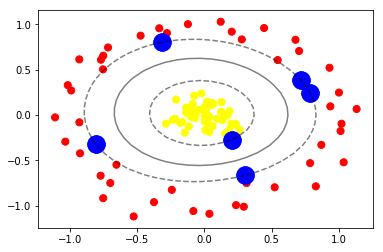

In [14]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(rbf)
plt.scatter(rbf.support_vectors_[:,0], rbf.support_vectors_[:,1], s=300, lw=1, facecolors="blue")

## Ajustar los parámetros de SVM

In [15]:
X, Y = make_blobs(n_samples=100, centers = 2, random_state=0, cluster_std=1.2)

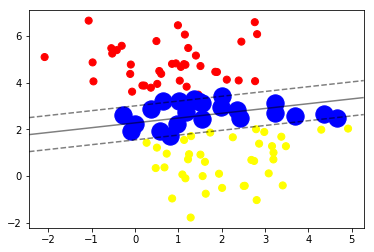

In [16]:
plt.scatter(X[:,0], X[:,1], c = Y, s=50, cmap="autumn")
model = SVC(kernel="linear", C=10)
model.fit(X,Y)
plt_svc(model)

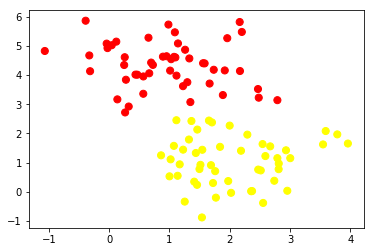

In [17]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
plt.scatter(X[:,0], X[:,1], c = Y, s=50, cmap="autumn")

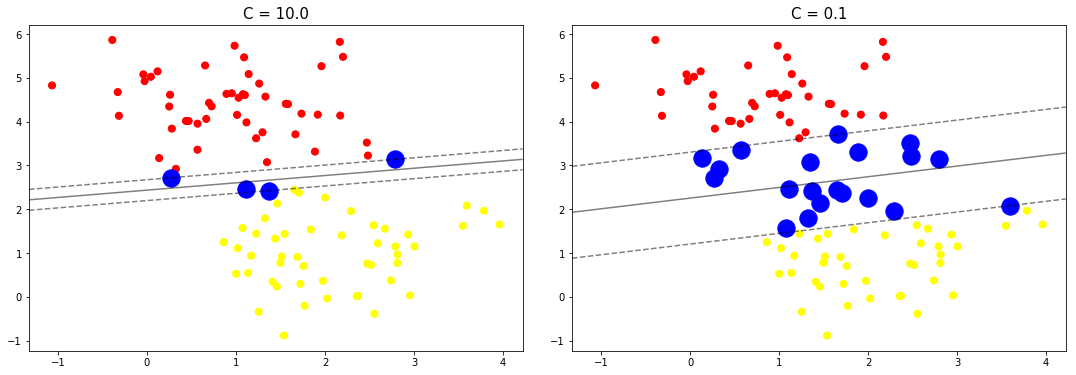

In [60]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left = 0.05, right = 0.95, wspace=0.1)

for ax_i, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel="linear", C=C)
    model.fit(X,Y)
    ax_i.scatter(X[:,0],X[:,1], c = Y, s = 50, cmap="autumn")
    plt_svc(model, ax_i)
    ax_i.set_title("C = {0:.1f}".format(C), size = 15)